# Проект: Исследование стартапов

- Автор: Алексей Кознов
- Дата: 25.03.25

### Цели и задачи проекта

Провести предобработку датасета, оценить данные на "адекватность", а также провести исследовательский анализ датасета для финансовой компании.

Задачи:
1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные в переменные 
PATH = "https://code.s3.yandex.net/datasets/"
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')

# Выгружаем данные в переменные для дополнительных датасетов
fund_df = pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

Выведем общую информацию о датафреймах и первые строки

In [3]:
# Выводим информацию о датафреймах
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [8]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [10]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


В датасете company_and_rounds_df есть 2 столбца с почти идентичным названием, построим диаграмму Венна, чтобы оценить данные в этих столбцах

In [13]:
# Пытаемся импортировать venn2
try:
    from matplotlib_venn import venn2
except ImportError:
# Если модуля нет — устанавливаем
    !pip install matplotlib-venn --quiet
    from matplotlib_venn import venn2

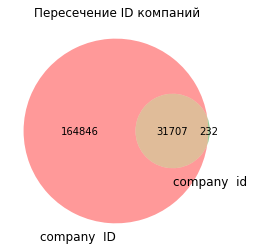

In [14]:
# Создаем переменные с множеством уникальных id для столюцов 'company  ID' и 'company  id'
first_id = set(company_and_rounds_df['company  ID'].dropna())
second_id = set(company_and_rounds_df['company  id'].dropna())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ID компаний")
plt.show()

Датасет `acquisition_df` содержит 9407 строк и 6 столбцов и содержит информацию о покупках одними компаниями других компаний
- названия столбцов написаны корректно
- столбец с датой `acquired_at` необходимо из формата object привести к формату datetime64

Датасет `company_and_rounds_df` содежит 217774 строк и 22 столбца и содержит информацию о компаниях и раундах финансирования
- столбцы `company  ID`  `company  id` переименовать(добавить суффикс _x и _y), чтобы избежать ошибок в дальнейшем
- названия столбцов написаны некорректно, следует привести к snake_case
- столбцы с датой `founded  at`, `closed  at`, `funded  at` необходимо из формата object привести к формату datetime64

Датасет `people_df` содежит 226709 строк и 6 столбцов и содержит информацию о сотрудниках
- названия столбцов написаны корректно

Датасет `education_df` содежит 109610 строк и 4 столбца и содержит информацию об образовании сотрудника
- названия столбцов написаны корректно
- столбцы с датой `graduated_at` необходимо из формата object привести к формату datetime64

Датасет `degrees_df` содежит 109610 строк и 4 столбца и содержит информацию о типе образования сотрудника
- названия столбцов написаны корректно

In [15]:
# Создадим маску для nan, где совпадения с nan даст TRUE в строке
string_nan_mask = company_and_rounds_df.apply(
    lambda col: col.astype(str).str.lower() == 'nan'
)

# Выведем результат с подсчетом количества nan в строках 
display(string_nan_mask.sum())

company  ID                 302
name                        302
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

In [16]:
# Посчитаем настоящие nan 
true_nan = company_and_rounds_df.isna().sum()
# Посчитаем строковые nan 
string_nan = string_nan_mask.sum()

# Сводим в одну таблицу
compare = pd.DataFrame({
    'True NaN': true_nan,
    'String "nan"': string_nan
})
display(compare)

,True NaN,"String ""nan"""
company ID,302,302
name,302,302
category code,73888,73888
status,302,302
founded at,107818,107818
closed at,214325,214325
domain,70615,70615
network username,122240,122240
country code,109167,109167
investment rounds,302,302


### 1.2. Смена типов и анализ пропусков

In [17]:
# Переименуем столбцы в датасете company_and_rounds_df
company_rename_dict = {'company  ID': 'company_id_x',
                       'company  id': 'company_id_y'}

company_and_rounds_df = company_and_rounds_df.rename(columns=company_rename_dict)

In [18]:
# Приведем столбцы к стилю snake case
company_and_rounds_df.columns = company_and_rounds_df.columns.str.lower().str.replace('  ', '_')

# Выведем результат
company_and_rounds_df.columns

Index(['company_id_x', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_y', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [19]:
# Обработаем столбцы с датой в датасете acquisition_df
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [20]:
# Обработаем столбцы с датой в датасете company_and_rounds_df
for col in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], errors='coerce')

# Выведем результат    
company_and_rounds_df.dtypes

company_id_x                  float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_y                  float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [21]:
# Обработаем столбцы с датой в датасете education_df
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

# Выведем результат
education_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [22]:
# Изменим отображение 
pd.set_option('display.float_format', '{:,.2f}'.format)

При первичном анализе мы обнаружили пропуски в датафреймах. Узнаем абсолютное и относительное количество пропусков.

In [23]:
# Выведем количество пропусков 
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [24]:
# Выведем относительное количество пропусков
acquisition_df.isna().mean()

id                     0.00
acquiring_company_id   0.00
acquired_company_id    0.00
term_code              0.81
price_amount           0.00
acquired_at            0.00
dtype: float64

In [25]:
# Выведем количество пропусков 
company_and_rounds_df.isna().sum()

company_id_x              302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_y           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [26]:
# Выведем относительное количество пропусков
company_and_rounds_df.isna().mean()

company_id_x          0.00
name                  0.00
category_code         0.34
status                0.00
founded_at            0.50
closed_at             0.98
domain                0.32
network_username      0.56
country_code          0.50
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
funding_round_id      0.76
company_id_y          0.76
funded_at             0.76
funding_round_type    0.76
raised_amount         0.76
pre_money_valuation   0.76
participants          0.76
is_first_round        0.76
is_last_round         0.76
dtype: float64

In [27]:
# Выведем количество пропусков 
people_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [28]:
# Выведем относительное количество пропусков
people_df.isna().mean()

id                 0.00
first_name         0.00
last_name          0.00
company_id         0.85
network_username   0.83
dtype: float64

In [29]:
# Выведем количество пропусков 
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [30]:
# Выведем относительное количество пропусков
education_df.isna().mean()

id             0.00
person_id      0.00
instituition   0.00
graduated_at   0.47
dtype: float64

In [31]:
# Выведем количество пропусков 
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [32]:
# Выведем относительное количество пропусков
degrees_df.isna().mean()

id            0.00
object_id     0.00
degree_type   0.10
subject       0.26
dtype: float64

In [33]:
# Пытаемся импортировать missingno
try:
    import missingno as msno
except ImportError:
# Если модуля нет — устанавливаем
    !pip install missingno --quiet
    import missingno as msno

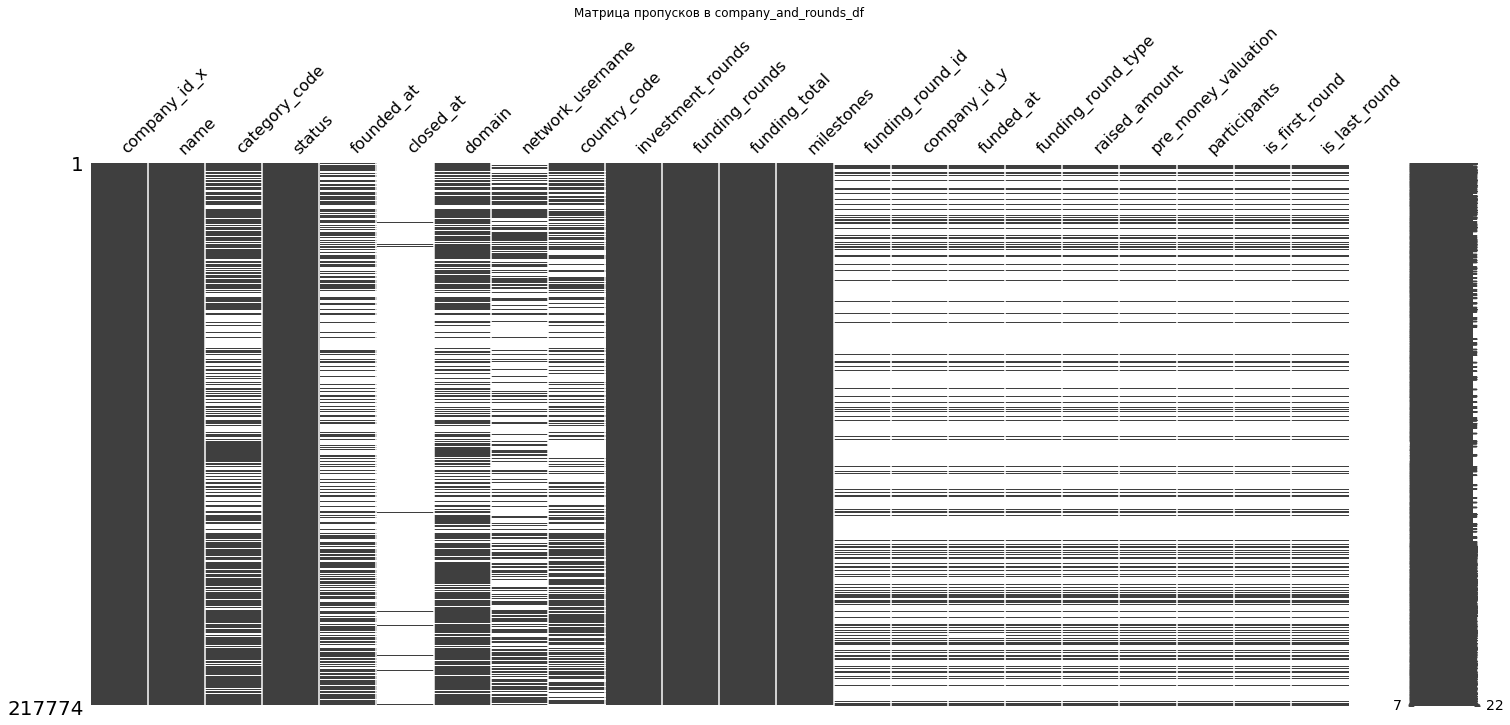

In [34]:
# Построим матрицу пропусков с помощью missingno в датасете company_and_rounds_df
msno.matrix(company_and_rounds_df)
plt.title("Матрица пропусков в company_and_rounds_df")
plt.show()

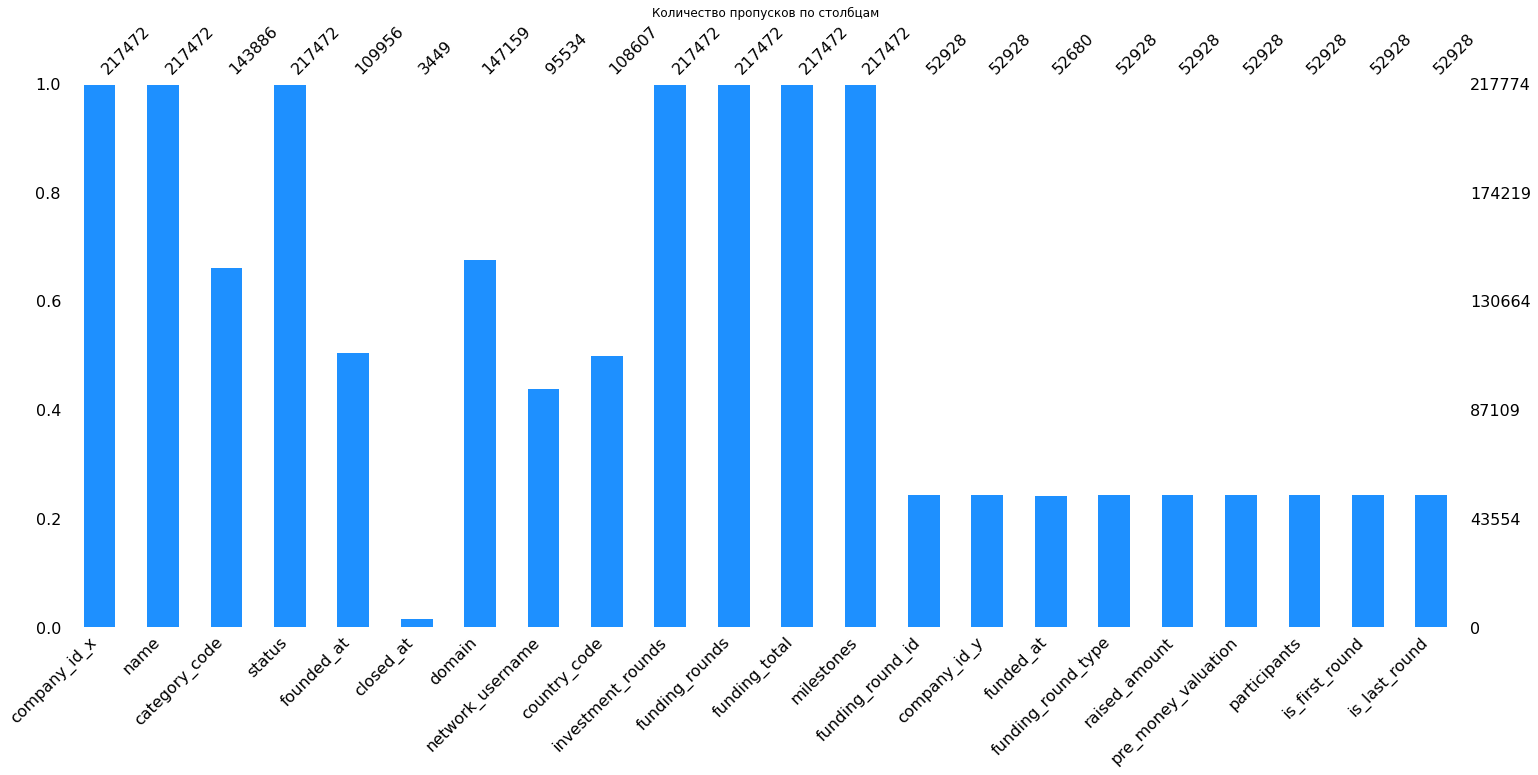

In [35]:
# Построим диаграмму пропусков по столбцам датасета company_and_rounds_df
msno.bar(company_and_rounds_df, color="dodgerblue")
plt.title("Количество пропусков по столбцам")
plt.show()

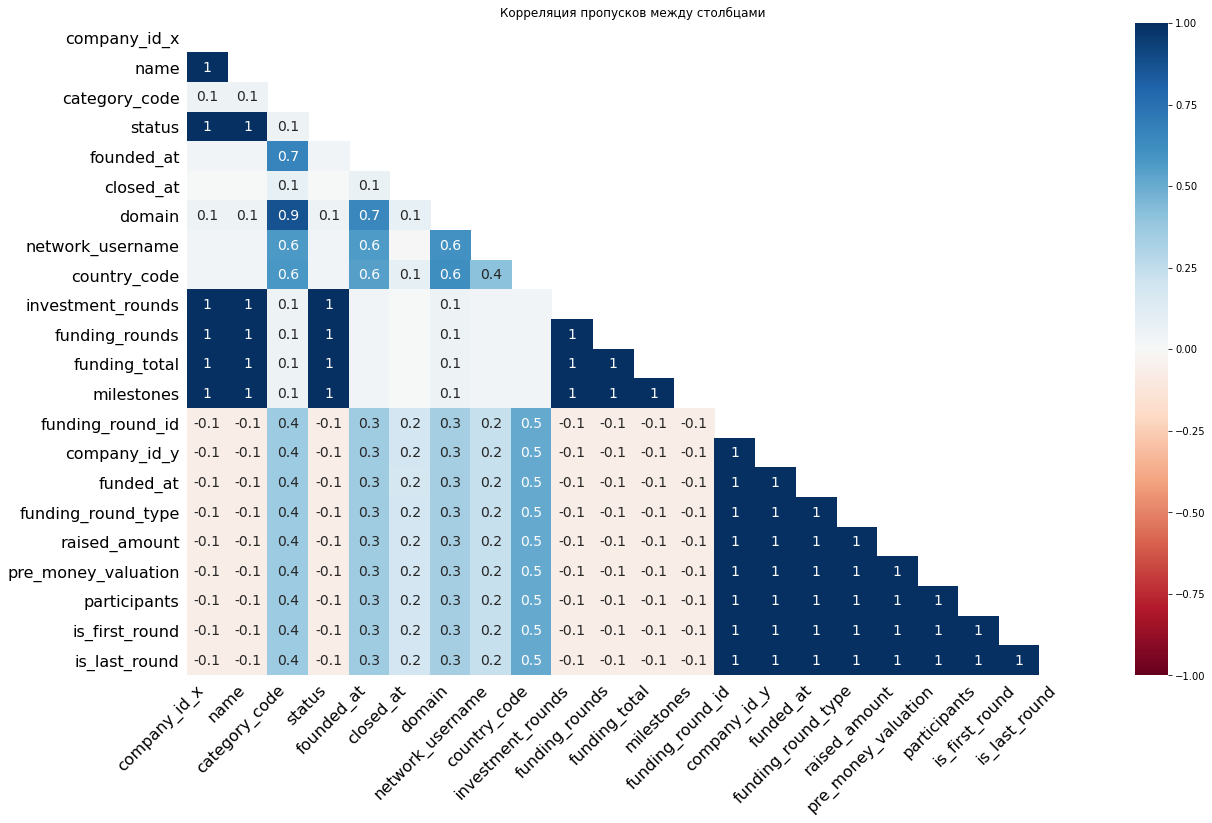

In [36]:
# 
msno.heatmap(company_and_rounds_df)
plt.title("Корреляция пропусков между столбцами")
plt.show()

---

### Промежуточный вывод

Мы загрузили необходимые данные по проекту. Провели первичное знакомство с данными и первичную предобработку:
- изменили тип данных в датасетах в стобцах с датой с типа `object` на тип `datetime64`.
- привели названия столбцов датасета company_and_rounds_df  к стилю snake_case
- во всех датасетах присутствуют пропуски, такое количество пропусков может снизить качество исследования
- некоторые пропуски сгруппированны в определенных столбцах
- согласно тепловой карте пропусков некоторые столбцы связаны, если есть пропуски в одних столбцах, то точно есть в других, например столбцы company id и столбцы is last round, is first raund и др. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Составим сводную таблицу в годам, а которой на основании столбца `raised_amount` для каждого года укажем типичный размер средств, выделяемый в рамках одного раунда, а также общее количество раундов за этот год. Для определения типичного размера средств будем использовать медиану, т.к. есть выбросы, а медиана менее чувствительна к выбросам.

In [37]:
# Выделим год из даты
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year 

# Создадим сводную таблицу
pivot_raised_amount = pd.pivot_table(
    company_and_rounds_df,
    index='funded_year',
    values='raised_amount',
    aggfunc=['median', 'count'])

# Переименуем столбцы для удобства
pivot_raised_amount.columns = ['median_amount', 'rounds_count']

# Фильтруем годы с более чем 50 раундами
pivot_filtered = pivot_raised_amount[pivot_raised_amount['rounds_count'] > 50]

# Выведем таблицу
display(pivot_filtered)

,median_amount,rounds_count
funded_year,,
"1,999.00","2,000,000.00",76
"2,000.00","4,200,000.00",125
"2,001.00","3,000,000.00",96
"2,002.00","4,200,000.00",116
"2,003.00","3,000,000.00",159
"2,004.00","5,000,000.00",291
"2,005.00","5,500,000.00",1633
"2,006.00","5,000,000.00",2436
"2,007.00","3,973,320.00",3279


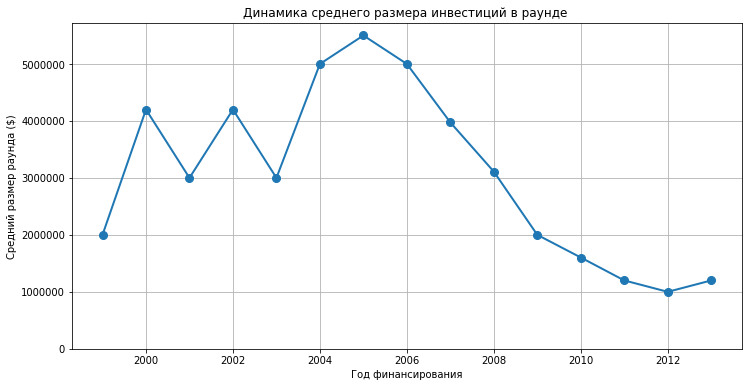

In [38]:
# Создаем график
plt.figure(figsize=(12, 6))

plt.plot(pivot_filtered.index, pivot_filtered['median_amount'],
         marker='o', linewidth=2, markersize=8)

# Настройка оси Y
plt.gca().yaxis.set_major_formatter('{:.0f}'.format) 
plt.ylim(0) 

# Добавляем подписи
plt.title('Динамика среднего размера инвестиций в раунде ')
plt.xlabel('Год финансирования')
plt.ylabel('Средний размер раунда ($)')
plt.grid(True)

# Выводим график
plt.show()

Создадим график количества раундов по годам

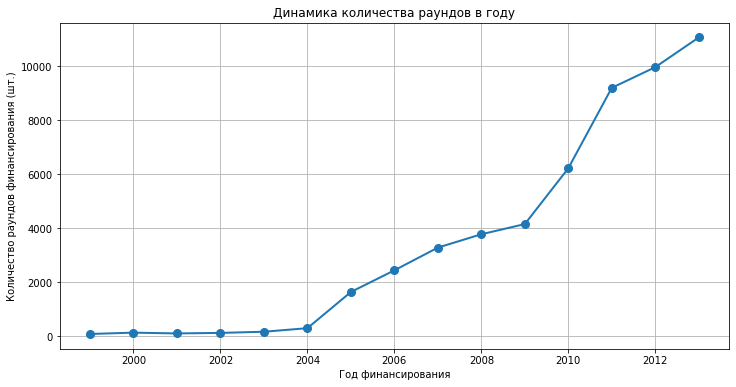

In [39]:
# Создаем график
plt.figure(figsize=(12, 6))

plt.plot(pivot_filtered.index, pivot_filtered['rounds_count'],
         marker='o', linewidth=2, markersize=8)

# Добавляем подписи
plt.title('Динамика количества раундов в году')
plt.xlabel('Год финансирования')
plt.ylabel('Количество раундов финансирования (шт.)')
plt.grid(True)

# Выводим график
plt.show()

В 2005 году медианная сумма одного раунда финансирвоания была самая максимальная (5500000 дол.), далее наблюдается тенденция по снижению этой суммы. Это не удивительно, ведь если посмотреть на график количества раундов по годам, то видно, что с 2004 года наблюдается большой рост количества раундов. А в 2013 году наблюдается максимальное количество раундов (11072 шт.), в 2004 году раундов было 291.

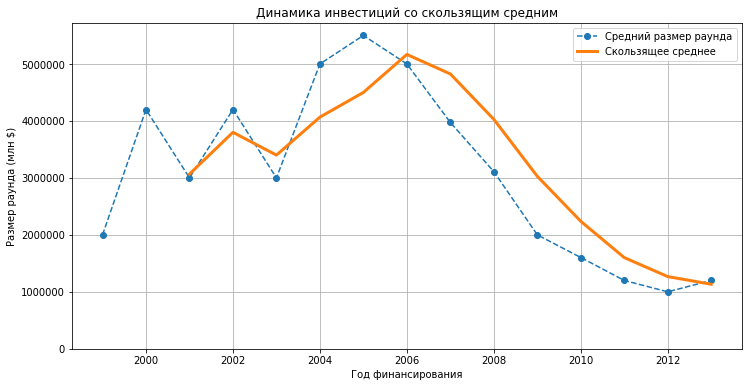

In [40]:
# Создаем копию данных для безопасной модификации
pivot_filtered = pivot_filtered.copy()  # Появлялась ошибка, если не создать копию

# Рассчитываем скользящее среднее за 3 года
window = 3
pivot_filtered['moving_avg'] = pivot_filtered['median_amount'].rolling(window=window).mean()

# Создаем график
fig, ax = plt.subplots(figsize=(12, 6))

# Основной график 
ax.plot(pivot_filtered.index, pivot_filtered['median_amount'],
        marker='o', linestyle='--',dd markersize=6, label='Средний размер раунда')

# Скользящее среднее 
ax.plot(pivot_filtered.index, pivot_filtered['moving_avg'],
        linewidth=3,
        label='Скользящее среднее')

# Настройки графика
ax.set_title('Динамика инвестиций со скользящим средним')
ax.set_xlabel('Год финансирования')
ax.set_ylabel('Размер раунда (млн $)')
ax.legend()
plt.gca().yaxis.set_major_formatter('{:.0f}'.format) 
plt.ylim(0)
plt.grid(True)

# Выводим график
plt.show()

In [41]:
# Пытаемся импортировать wb
try:
    from pandas_datareader import wb
except ImportError:
# Если модуля нет — устанавливаем
    !pip install pandas_datareader --quiet
    from pandas_datareader import wb

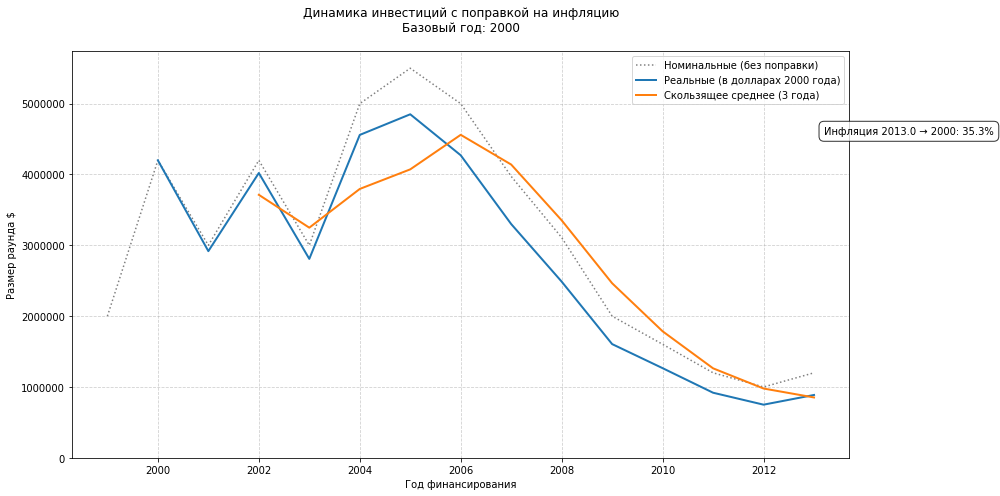

In [43]:
# Сбросим мультииндекс
cpi = cpi.reset_index()

# Переименуем столбец FP.CPI.TOTL в CPI
cpi = cpi[['year', 'FP.CPI.TOTL']].rename(columns={'FP.CPI.TOTL': 'CPI'})

# Сменим тип float в столбце на int
cpi['year'] = pd.to_numeric(cpi['year'], downcast='integer')

# Установим столбец year как индекс
cpi = cpi.set_index('year')

# Соединим с сводной таболицей с раундами и суммами по раундам
pivot_filtered = pivot_filtered.join(cpi, how='left')

# Корректировка на инфляцию (базовый год 2000)
base_year = 2000

# Извлечем значение cpi для базового года (2000)
base_cpi = cpi.loc[base_year, 'CPI']

# Создадим столбец с скорректированными на инфляцию суммами 
pivot_filtered['adjusted_amount'] = pivot_filtered['median_amount'] * (base_cpi / pivot_filtered['CPI'])

# Построим график
plt.figure(figsize=(14, 7))

# Номинальные значения (без поправки)
plt.plot(pivot_filtered.index, pivot_filtered['median_amount'], 
         label='Номинальные (без поправки)', linestyle=':', color='gray')

# Реальные значения (с поправкой)
plt.plot(pivot_filtered.index, pivot_filtered['adjusted_amount'], 
         label=f'Реальные (в долларах {base_year} года)', linewidth=2)

# Скользящее среднее для реальных значений (с поправкой на инфляцию)
window = 3
pivot_filtered['adjusted_ma'] = pivot_filtered['adjusted_amount'].rolling(window).mean()
plt.plot(pivot_filtered.index, pivot_filtered['adjusted_ma'], 
         label=f'Скользящее среднее ({window} года)', linewidth=2)

# Настройки графика
plt.title(f'Динамика инвестиций с поправкой на инфляцию\nБазовый год: {base_year}', pad=20)
plt.ylabel('Размер раунда $')
plt.xlabel('Год финансирования')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Добавляем аннотацию с коэффициентом инфляции
latest_year = pivot_filtered.index.max()
inflation_rate = (cpi.loc[latest_year, 'CPI'] / base_cpi - 1) * 100
plt.annotate(f'Инфляция {latest_year} → {base_year}: {inflation_rate:.1f}%',
             xy=(latest_year, pivot_filtered['adjusted_amount'].max()),
             xytext=(10, -20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Настройка оси Y
plt.gca().yaxis.set_major_formatter('{:.0f}'.format) 
plt.ylim(0) 

plt.tight_layout()
plt.show()


### 2.2. Люди и их образование

Проверим, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Для задачи объединим 3 датасета в один, т.к. в каждом есть информация об образовании, то они могут дополнять друг друга и мы будем иметь больше данных для анализа. Для объединения исправим столбец object_id в датасете degrees_df 

In [44]:
# Уберем лишние символы в столюце object_id
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '')

In [45]:
# Изменим тип данных  в столюце object_id
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], errors='coerce')

# Выведем результат
degrees_df.dtypes

id              int64
object_id       int64
degree_type    object
subject        object
dtype: object

In [46]:
# Объединим 3 датасета в один
temp_merged = people_df.merge(education_df, left_on='id', right_on='person_id', how='left')

final_merged = temp_merged.merge(degrees_df, left_on='person_id', right_on='object_id', how='left')

# Переименуем столбцы id, чтобы избежать ошибок
final_merged = final_merged.rename(columns={
    'id_x': 'people_id',     
    'id_y': 'education_id',  
    'id': 'degree_id'})

# Выведем результат
final_merged.head()

,people_id,first_name,last_name,company_id,network_username,education_id,person_id,instituition,graduated_at,degree_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,"2,415.00",10.00,NaN,Computer Science
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Создадим столбец is_education, который будет содержать 1 если в одной из таблиц заполнены сведения об образовании и 0 если не заполнены. 

Напишем функцию, которая будет возвращать значение 0 если все столбцы, где есть сведения об образовании пусты и 1 если там есть сведения

In [47]:
# Определяем список колонок для проверки
education_cols = ['instituition', 'graduated_at', 'degree_type', 'subject']

# Создаем столбец is_education 
final_merged['is_education'] = (~final_merged[education_cols].isna().all(axis=1)).astype(int)

# выведем результат
final_merged.head()

,people_id,first_name,last_name,company_id,network_username,education_id,person_id,instituition,graduated_at,degree_id,object_id,degree_type,subject,is_education
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,"2,415.00",10.00,NaN,Computer Science,1
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0


Разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [48]:
final_merged['company_id'].value_counts()

59.00         722
29.00         393
1,242.00      320
231,067.00    195
4,715.00      177
             ... 
43,377.00       1
193,102.00      1
74,195.00       1
81,322.00       1
706.00          1
Name: company_id, Length: 22922, dtype: int64

In [49]:
# Оценим группы через процентили
final_merged.groupby('company_id')['people_id'].nunique().describe(percentiles=[.25, .50, .75, .90, .95])

count   22,922.00
mean         1.51
std          2.76
min          1.00
25%          1.00
50%          1.00
75%          1.00
90%          2.00
95%          4.00
max        244.00
Name: people_id, dtype: float64

Через процентили оценить группы не получится, почти 90 процентов компаний имеют 1-2 сотрудника. Оценим через количество сотрудников по групупам компаний.

In [50]:
# Группируем по company_id и считаем уникальных сотрудников
company_sizes = final_merged.groupby('company_id')['people_id'].nunique().reset_index()

company_sizes.columns = ['company_id', 'stuff_count']  

# Группируем по stuff_count и считаем количество компаний
result = company_sizes.groupby('stuff_count')['company_id'].count().reset_index()

result.columns = ['stuff_count', 'companies_count'] 

# Сортируем по stuff_count и выводим
result = result.sort_values('stuff_count')
display(result)

,stuff_count,companies_count
0,1,18117
1,2,2709
2,3,921
3,4,450
4,5,237
5,6,138
6,7,100
7,8,59
8,9,46
9,10,25


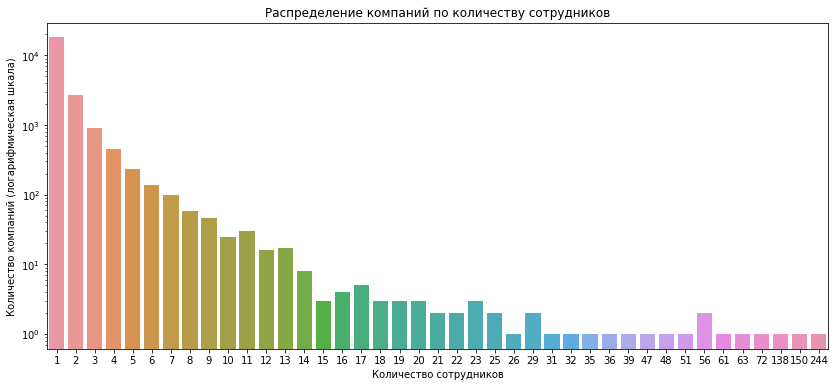

In [51]:
# Построим график для таблицы
plt.figure(figsize=(14, 6))

sns.barplot(x='stuff_count', y='companies_count', data=result)
# Применим логарифмическую шкалы для оси Y, т.к. значения сильно разнятся
plt.yscale('log') 

# Добавим названия осей и название графика
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний (логарифмическая шкала)')
plt.title('Распределение компаний по количеству сотрудников')

# Выведем график
plt.show()

Больше всего компаний с 1 человеком, далее с 2-4 человека, 5-13 и более 14.

In [52]:
# Удаляем дубликаты (в таблицах degrees_df и education_df несколько записей у одного сотрудника)
unique_employees = final_merged.drop_duplicates(subset=['company_id', 'people_id'])

# Сгруппируем данные по компаниям, посчитаем количество сотрудников и количество сотрудников с заполненным образованием
company_stats = unique_employees.groupby('company_id', observed=True).agg(
    total_employees=('people_id', 'count'),
    with_edu=('is_education', 'sum')).reset_index()

# Рассчитаем долю без образования
company_stats['without_edu'] = (company_stats['total_employees'] - company_stats['with_edu']) / company_stats['total_employees']

# Создадим столбец size_groups и присвоим категорию комапнии по численности
company_stats['size_groups'] = pd.cut(
    company_stats['total_employees'],
    bins=[0, 1, 4, 13, float('inf')],
    labels=['1. микрокомпания (1)', 
            '2. маленькая компания (2-4)', 
            '3. средняя компания(5-13)', 
            '4. крупная компания(14+)'])

# Рассчитаем среднюю долю сотрудников без образования по категориям компаний
result = company_stats.groupby('size_groups', observed=True).agg(
    companies_count = ('company_id', 'count'),
    avg_without_edu = ('without_edu', 'mean'))

# Выведем результат
display(result)

,companies_count,avg_without_edu
size_groups,,
1. микрокомпания (1),18117,0.46
2. маленькая компания (2-4),4080,0.47
3. средняя компания(5-13),668,0.52
4. крупная компания(14+),57,0.39


В компаниях, где работают 1, 2, 3 или 4 (а это почти 95 процентов всех компаний из данных) размер компании не влияет на количество сотрудников, у которых указано образование, в среднем доля составляет 0.47. Немного выделяются компании где 5-13 сотрудников, там доля составляет 0.52.Но разница между этими группами незначительна. В крупных компаниях, где количество сотрудников более 14 человек доля, у кого не указано образование ниже всего и составляет 0.39. Скорее всего это связано с наличием HR отдела и других отделов у крупных компаний, которые заполняют данные о сотрудниках, ведут их, пишут отчеты, в отличие от небольших компаний. Гипотеза подтвердилась, размер компании влияет на полноту данных об образовании сотрудников.

### 2.3. Объединять или не объединять — вот в чём вопрос

Проверим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах.

In [53]:
# Уберем пропуски из столбцов network_username в датасетах
people_df_temp = people_df.dropna(subset=['network_username'])
company_and_rounds_df_temp = company_and_rounds_df.dropna(subset=['network_username'])

# Посмотрим сколько общих network_username есть между датасетами people_df и company_and_rounds_df
common_network_usernames = set(people_df_temp['network_username']).intersection(set(company_and_rounds_df_temp['network_username']))

# Выведем результат
print(f'Количество общих network_username: {len(common_network_usernames)}')

Количество общих network_username: 2199


In [54]:
# Посчитаем долю общих network_username между датасетами people_df и company_and_rounds_df
print(f'Процент совпадений в people_df: {round((len(common_network_usernames) / len(people_df_temp)) * 100, 2)}%')
print(f'Процент совпадений в company_and_rounds_df: {round((len(common_network_usernames) / len(company_and_rounds_df_temp)) * 100, 2)}%')

Процент совпадений в people_df: 5.66%
Процент совпадений в company_and_rounds_df: 2.3%


По полученным результат столбец network_usernames не стоит использовать для объединеиня датасетов, он содержит минимальные количества перечений между датасетами, которые возможно случайны. Скорее всего network_usernames в people_df это ник сотрудника, а в company_and_rounds_df ник компании. 

In [55]:
# Посмотрим сколько общих network_username есть между датасетами fund_df  и people_df и company_and_rounds_df
fund_df_temp = fund_df.dropna(subset=['network_username'])
common_network_usernames = set(fund_df_temp['network_username']).intersection(set(company_and_rounds_df_temp['network_username']))

# Выведем результат
print(f'Количество общих network_username: {len(common_network_usernames)}')

common_network_usernames = set(fund_df_temp['network_username']).intersection(set(company_and_rounds_df_temp['network_username']))

# Выведем результат
print(f'Количество общих network_username: {len(common_network_usernames)}')

Количество общих network_username: 70
Количество общих network_username: 70


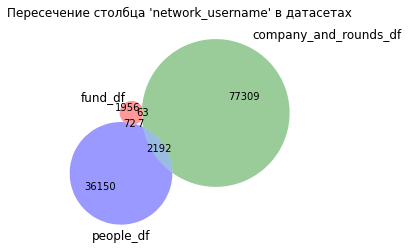

In [56]:
# Визуализируем полученные результаты
from matplotlib_venn import venn3 

# Строим диаграмму Венна
venn3([set(fund_df_temp['network_username']), set(company_and_rounds_df_temp['network_username']), set(people_df_temp['network_username'])], set_labels=('fund_df', 'company_and_rounds_df', 'people_df'))

 # Отображаем график
plt.title("Пересечение столбца 'network_username' в датасетах")
plt.show()    

Между дополнительным датасетом fund_df и датасетами people_df и company_and_rounds_df также очень маленькое количество пересечений.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.
Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. 

In [57]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_x         217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Исходя из анализа данных датасета company_and_rounds_df, а также судя по количеству строк некоторых его столбцов, учитывая, что столбец столбец company_id практически полностью дулирует другой столбец с таким же именем, а также то как распределены пропуски в столбцах и какая корреляция пропусков между столбцами можем сделать вывод, что ранее датасет состоял из 2 таблиц. Нам следует его также разделить на 2 таблицы и в одной таблице будет информация о компании, во второй информация о этапах финансирования

Добавим в датасеты только необходимые столбцы для дальнейшего анализа. Не будем добавлять следующие столбцы: 'category_code', 'domain'

In [58]:
# Создадим новый датафрейм companies_df
companies_df = company_and_rounds_df[['company_id_x', 'name', 'status', 
    'founded_at', 'closed_at', 'network_username',
    'country_code', 'category_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].reset_index(drop=True)


# Выведем результат
display(companies_df.info())

# Создадим новый датафрейм rounds_df
rounds_df = company_and_rounds_df[['funding_round_id', 'company_id_y', 'funded_at',
    'funding_round_type', 'raised_amount', 'pre_money_valuation',
    'participants', 'is_first_round', 'is_last_round', 'funded_year']].reset_index(drop=True)


# Выведем результат
display(rounds_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_x       217472 non-null  float64       
 1   name               217472 non-null  object        
 2   status             217472 non-null  object        
 3   founded_at         109956 non-null  datetime64[ns]
 4   closed_at          3449 non-null    datetime64[ns]
 5   network_username   95534 non-null   object        
 6   country_code       108607 non-null  object        
 7   category_code      143886 non-null  object        
 8   investment_rounds  217472 non-null  float64       
 9   funding_rounds     217472 non-null  float64       
 10  funding_total      217472 non-null  float64       
 11  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 19.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_y         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


None

Часть данных мы уже предобработали ранее, но также необходимо провести работу с дубликатами.

In [59]:
# Проверяем полные дубликаты в датафрейме companies_df
companies_df.duplicated().sum()

21220

In [60]:
# Удаляем дубликаты в датафрейме companies_df
companies_df = companies_df.drop_duplicates()

# Проверяем результат
companies_df.duplicated().sum()

0

In [61]:
# Проверяем полные дубликаты в датафрейме companies_df
rounds_df.duplicated().sum()

164845

In [62]:
# Удаляем дубликаты в датафрейме companies_df
rounds_df = rounds_df.drop_duplicates()

# Проверяем результат
rounds_df.duplicated().sum()

0

In [63]:
rounds_df.head()

,funding_round_id,company_id_y,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00,"2,005.00"
1,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00,"2,007.00"
2,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00,"2,008.00"
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,"1,644.00","1,001.00",2008-02-26,series-a,"5,000,000.00",0.00,3.00,1.00,1.00,"2,008.00"


---

### Промежуточный вывод

На данном этапе мы провели следующую работу:
- составили сводную таблицу по годам финансирования и для каждого года вывели типичный размер средств, выделяемый в рамках одного раунда, а также общее количество раундов за этот год. В 2005 году была максимальная сумма финансирования, а в 2013 самое больше количество раундов
- проверили, зависит ли полнота сведений об образовании сотрудников от размера компаний и гипотеза подтвердилась, у крупных компаний количество пропусков меньше по сравнению с остальными компаниями.
- проверили, подходит ли для объединения данных столбец network_username. Результат - не подходит
- разбили датасет company_and_rounds_df на два датасета для дальнейшего анализа


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

In [64]:
# Выведем информацию о датасете companies_df
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_x       196553 non-null  float64       
 1   name               196553 non-null  object        
 2   status             196553 non-null  object        
 3   founded_at         91227 non-null   datetime64[ns]
 4   closed_at          2620 non-null    datetime64[ns]
 5   network_username   80591 non-null   object        
 6   country_code       87990 non-null   object        
 7   category_code      123186 non-null  object        
 8   investment_rounds  196553 non-null  float64       
 9   funding_rounds     196553 non-null  float64       
 10  funding_total      196553 non-null  float64       
 11  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 19.5+ MB


In [65]:
# Объединим датасет companies_df и acquisition_df
df = (pd.merge(companies_df, acquisition_df, 
               left_on='company_id_x', 
               right_on='acquired_company_id', 
               how='left')
)

In [66]:
# Выведем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196697 entries, 0 to 196696
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_id_x          196696 non-null  float64       
 1   name                  196696 non-null  object        
 2   status                196696 non-null  object        
 3   founded_at            91331 non-null   datetime64[ns]
 4   closed_at             2620 non-null    datetime64[ns]
 5   network_username      80679 non-null   object        
 6   country_code          88106 non-null   object        
 7   category_code         123307 non-null  object        
 8   investment_rounds     196696 non-null  float64       
 9   funding_rounds        196696 non-null  float64       
 10  funding_total         196696 non-null  float64       
 11  milestones            196696 non-null  float64       
 12  id                    9390 non-null    float64       
 13 

In [67]:
# Отфильтруем данные в датасете
df = (df[((df['funding_rounds'] > 0) 
        | (df['investment_rounds'] > 0))
        | (df['status'] == 'acquired')].reset_index()
)

# Выведем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 40890 non-null  int64         
 1   company_id_x          40890 non-null  float64       
 2   name                  40890 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   network_username      20938 non-null  object        
 7   country_code          34858 non-null  object        
 8   category_code         35436 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

In [68]:
# Выведем первые строки
df.head()

,index,company_id_x,name,status,founded_at,closed_at,network_username,country_code,category_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,0,1.00,Wetpaint,operating,2005-10-17,NaT,BachelrWetpaint,USA,web,0.00,3.00,"39,750,000.00",5.00,NaN,NaN,NaN,NaN,NaN,NaT
1,1,10.00,Flektor,acquired,NaT,NaT,NaN,USA,games_video,0.00,0.00,0.00,0.00,1.00,11.00,10.00,NaN,"20,000,000.00",2007-05-30
2,2,100.00,There,acquired,NaT,NaT,NaN,USA,games_video,0.00,0.00,0.00,4.00,20.00,377.00,100.00,cash,0.00,2005-05-29
3,13,"1,001.00",FriendFeed,acquired,2007-10-01,NaT,friendfeed,USA,web,0.00,1.00,"5,000,000.00",3.00,"1,901.00",5.00,"1,001.00",cash_and_stock,"47,500,000.00",2009-08-10
4,18,"10,014.00",Mobclix,acquired,2008-03-01,NaT,mobclix,USA,mobile,0.00,1.00,0.00,4.00,"3,878.00","23,054.00","10,014.00",NaN,0.00,2010-09-30



### 3.2. Анализ выбросов

Оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

In [69]:
# Проанализируем столбец funding_total в датасете
additional_quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
df['funding_total'].describe(percentiles=additional_quantiles)

count          40,890.00
mean       10,135,585.95
std        56,412,886.91
min                 0.00
1%                  0.00
5%                  0.00
10%                 0.00
25%                 0.00
50%           600,000.00
75%         5,631,320.00
90%        22,391,020.00
95%        43,600,000.00
99%       134,203,880.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

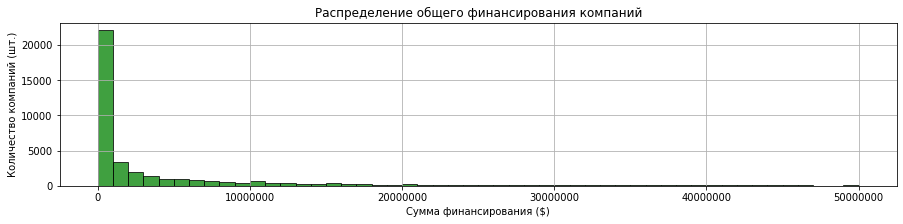

In [70]:
# Создаём контейнер графика 
plt.figure(figsize=(15, 3))

# Строим гистограмму 
df['funding_total'].plot(
                kind='hist', 
                bins=50,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                color='g',
                range=(0, 50_000_000)
)

# Настраиваем оформление графика
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Сумма финансирования ($)')
plt.ylabel('Количество компаний (шт.)')

# Добавляем сетку графика
plt.grid()

# Изменим формат суммы финансирования
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Выводим график
plt.show()

Построим диаграмму "ящик с усами"

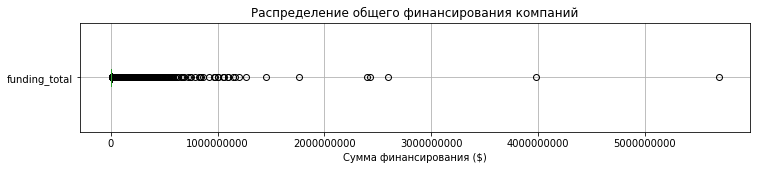

In [71]:
# Создаём контейнер графика 
plt.figure(figsize=(12, 2))

# Строим диаграмму размаха значений по столбцу funding_total
df.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Сумма финансирования ($)')

# Изменим формат суммы финансирования
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Выводим график
plt.show()

Построим диаграмму без выбросов

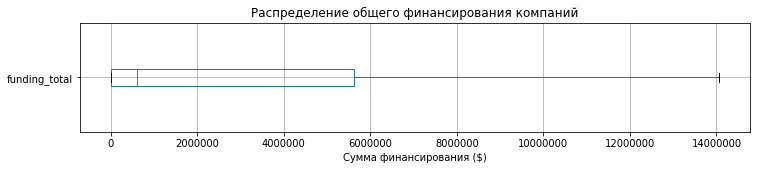

In [72]:
# Создаём контейнер графика 
plt.figure(figsize=(12, 2))

# Строим диаграмму размаха значений в столбце funding_total
df.boxplot(column='funding_total', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Сумма финансирования ($)')

# Изменим формат суммы финансирования
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Выводим график
plt.show()

In [73]:
# Рассчитаем межквартильный размах IQR:
# Рассчитываем квартили
Q1 = df['funding_total'].quantile(0.25)
Q3 = df['funding_total'].quantile(0.75)

IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выводим результат
display(f'Нижняя граница {lower_bound}')
display(f'Верхняя граница {upper_bound}')

'Нижняя граница -8446980.0'

'Верхняя граница 14078300.0'

Анализируя данные столбца с суммами финансирования, получили следующие выводы:
- анализируя гистограмму, гистограмма с перекосом вправо, хвост длинный, что указывает на выбросы, основная масса данных сосредоточена от 0 до 10 млн.
- медиана 600 тыс. долл., в то время как среднее больше 10 млн. долл, что указыает на выбросы
- стандартное отклонение более 56 млн.долл., что указывает на огромный разброс данных.
- типичный размер финансирования находится между 25 процентным и 75 процентным квантилем и составляет от 0 долл. до 5,6 млн. долл
- максимальное значение 5,7 млрд. долл. — явный выброс
- согласно графику ящик с усами без выбросов, а также расчетом IQR, выбросами можно считать все, что выше 14 млн. долл.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [75]:
# Фильтруем нужные компании
suspicious_acquisitions = df[
    (df['price_amount'].isin([0, 1])) & 
    (df['funding_total'] > 0)
]

# Отображаем результат
print(f"Найдено подозрительных сделок: {len(suspicious_acquisitions)}")

# Выведем 10 строк с этой группой компаний
suspicious_acquisitions.head(10)

Найдено подозрительных сделок: 1618


,index,company_id_x,name,status,founded_at,closed_at,network_username,country_code,category_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,66,"10,054.00",Jumptap,acquired,2005-01-01,NaT,jumptap,USA,mobile,0.00,7.00,"121,500,000.00",3.00,"9,288.00","23,283.00","10,054.00",cash_and_stock,0.00,2013-08-13
63,170,"101,312.00",SideTour,acquired,2011-06-01,NaT,sidetour,USA,web,0.00,3.00,"4,000,000.00",2.00,"9,653.00","11,391.00","101,312.00",NaN,0.00,2013-09-18
66,177,"101,340.00",ChoicePass,acquired,2011-07-01,NaT,choicepass,USA,enterprise,0.00,1.00,"250,000.00",1.00,"7,272.00","1,972.00","101,340.00",NaN,0.00,2012-06-18
67,181,"10,137.00",Producteev,acquired,2008-07-08,NaT,producteev,USA,software,0.00,3.00,"1,310,000.00",2.00,"8,254.00",757.00,"10,137.00",cash_and_stock,0.00,2012-11-05
68,184,"10,139.00",TradeCard,acquired,1999-01-01,NaT,TradeCard,USA,enterprise,0.00,2.00,"44,925,000.00",1.00,"9,326.00","44,008.00","10,139.00",NaN,0.00,2013-04-01
97,247,"10,179.00",GoodGuide,acquired,2007-12-01,NaT,GoodGuide,USA,web,0.00,3.00,"14,230,000.00",3.00,"7,502.00","167,670.00","10,179.00",NaN,0.00,2012-08-09
112,297,"10,199.00",Where I've Been,acquired,2007-06-08,NaT,whereivebeen,USA,travel,0.00,2.00,"1,750,000.00",2.00,"5,783.00","1,705.00","10,199.00",NaN,0.00,2011-07-11
114,299,"10,200.00",Swype,acquired,2002-01-01,NaT,Swype,USA,software,0.00,5.00,"13,900,000.00",3.00,"6,277.00","5,473.00","10,200.00",NaN,0.00,2011-10-06
138,390,"10,252.00",Mob.ly,acquired,2007-10-01,NaT,NaN,USA,mobile,0.00,1.00,"1,100,000.00",2.00,"3,204.00","11,391.00","10,252.00",NaN,0.00,2010-05-05
150,429,"10,273.00",Angstro,acquired,2007-04-27,NaT,NaN,USA,software,0.00,1.00,"225,000.00",0.00,"3,782.00",59.00,"10,273.00",NaN,0.00,2010-08-27


In [76]:
# Проанализируем столбец funding_total у этой группы компаний
suspicious_acquisitions['funding_total'].describe()

count           1,618.00
mean       18,152,961.94
std       144,503,027.47
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,500,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

In [77]:
# Выведем компанию, имеющую максимальное значение по funding_total
suspicious_acquisitions[suspicious_acquisitions['funding_total'] >= 5700000000]

,index,company_id_x,name,status,founded_at,closed_at,network_username,country_code,category_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1346,4584,"13,219.00",Clearwire,acquired,2003-10-01,NaT,NaN,USA,mobile,0.00,4.00,"5,700,000,000.00",2.00,"8,023.00","3,827.00","13,219.00",NaN,0.00,2012-12-17


Согласно информации из интерната компания Clearwire была куплена компанией конкурентом Spirit, общая сумма сделаки была 5 млрд.долл., а 5,7 млрд инвестиций это инвестиции, которые компания Clearwire привлекла от Intel, Google и других инвесторов. Также есть информация о 5,5 млрд долга, который взяла на себя Spirit после покупки. Поэтому сумма покупки за 0 долларов скорее является ошибкой.

In [78]:
# Выведем компанию, имеющую значение по funding_total более 6 млн. дол.
suspicious_acquisitions[suspicious_acquisitions['funding_total'] >= 6_000_000]

,index,company_id_x,name,status,founded_at,closed_at,network_username,country_code,category_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,66,"10,054.00",Jumptap,acquired,2005-01-01,NaT,jumptap,USA,mobile,0.00,7.00,"121,500,000.00",3.00,"9,288.00","23,283.00","10,054.00",cash_and_stock,0.00,2013-08-13
68,184,"10,139.00",TradeCard,acquired,1999-01-01,NaT,TradeCard,USA,enterprise,0.00,2.00,"44,925,000.00",1.00,"9,326.00","44,008.00","10,139.00",NaN,0.00,2013-04-01
97,247,"10,179.00",GoodGuide,acquired,2007-12-01,NaT,GoodGuide,USA,web,0.00,3.00,"14,230,000.00",3.00,"7,502.00","167,670.00","10,179.00",NaN,0.00,2012-08-09
114,299,"10,200.00",Swype,acquired,2002-01-01,NaT,Swype,USA,software,0.00,5.00,"13,900,000.00",3.00,"6,277.00","5,473.00","10,200.00",NaN,0.00,2011-10-06
191,646,"10,392.00",Intela,acquired,2006-02-02,NaT,intela,USA,advertising,0.00,2.00,"13,250,000.00",4.00,"9,841.00","81,499.00","10,392.00",NaN,0.00,2013-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40784,196261,"9,780.00",NitroSecurity,acquired,1999-01-01,NaT,NaN,USA,security,0.00,4.00,"24,500,000.00",2.00,"6,259.00","14,236.00","9,780.00",NaN,0.00,2011-10-04
40800,196299,"9,816.00",ShopWiki,acquired,2005-06-01,NaT,NaN,USA,ecommerce,0.00,1.00,"6,250,000.00",1.00,"5,067.00","1,809.00","9,816.00",NaN,0.00,2011-01-28
40820,196358,987.00,Zannel,acquired,NaT,NaT,NaN,USA,web,0.00,2.00,"16,000,000.00",2.00,"8,949.00","74,819.00",987.00,NaN,0.00,2011-03-28
40840,196430,992.00,wunderloop,acquired,1999-01-01,NaT,NaN,USA,advertising,0.00,1.00,"10,000,000.00",1.00,"9,916.00","19,182.00",992.00,NaN,0.00,2010-07-02


Исследуем компанию ShopWiki.
Компания была приобретена Oversee.net. Генеральный директор ShopWiki перешел в Oversee.net после покупки. Условия сделки не разглашаются. Видимо это причина почему сумма покупки 0.

In [79]:
# Рассчитаем межквартильный размах IQR:
# Рассчитываем квартили
Q1 = suspicious_acquisitions['funding_total'].quantile(0.25)
Q3 = suspicious_acquisitions['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим процентили для границ
lower_percentile = (suspicious_acquisitions['funding_total'] < lower_bound).mean() * 100
upper_percentile = (suspicious_acquisitions['funding_total'] > upper_bound).mean() * 100

print(f"Нижняя граница выбросов: {lower_bound:,.0f}$ (ниже {lower_percentile}% значений)")
print(f"Верхняя граница выбросов: {upper_bound:,.0f}$ (выше {round(upper_percentile, 2)}% значений)")

Нижняя граница выбросов: -18,250,000$ (ниже 0.0% значений)
Верхняя граница выбросов: 35,750,000$ (выше 9.09% значений)


Выводы:
- 1618 компаний куплены за 0 или 1 
- несмотря на финансирование, среднее финансирование: 18,2 млн.долл.
- медиана: 6 млн.долл. (50% компаний получили меньше этой суммы)
- максимум: 5,7 млрд.долл. 
- нижняя граница выбросов - 18 млн., но ее можно не учитывать, т.к. не бывает отрицательного финансирования, верхняя граница 35,8 млн.
- чуть более 9 процентов компаний имеют финансирование более 35,8 млн.

Возможные причины покупки за 0 или 1 доллар:
- смена юридической формы компании
- реорганизация внутри холдинга
- перевод активов между подразделениями
- ошибки в данных
- данные сделки не разглашаются


### 3.4. Цены стартапов по категориям

Выделим категории стартапов, характеризующиеся:
- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Для поиска стартапов с высокими ценами используем медиану, т.к. она устойчива к выбросам, а для топа с разбросом цен используем стандартное отклонение и межквартильный размах

In [80]:
# Группировка по категориям и расчет статистик
category_stats = df.groupby('category_code')['price_amount'].agg([
    ('median_price', 'median'),  
    ('std_price', 'std'), 
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))
]).reset_index()

In [81]:
# Топ-5 по медианной цене
top_median = category_stats.sort_values(by='median_price', ascending=False).head()

# Выведем результат
display(top_median)

,category_code,median_price,std_price,IQR
24,nanotech,"584,000,000.00",NaN,0.00
19,manufacturing,"72,000,000.00","969,657,968.02","615,000,000.00"
32,real_estate,"50,000,000.00","2,505,122,913.06","903,500,000.00"
2,automotive,"43,000,000.00","2,297,757,559.01","2,400,000,000.00"
3,biotech,"13,200,000.00","1,540,373,521.41","250,000,000.00"


In [82]:
# Топ-5 по разбросу (стандартное отклонение)
top_std = category_stats.sort_values(by='std_price', ascending=False).head()

# Выведем результат
display(top_std)

,category_code,median_price,std_price,IQR
9,enterprise,0.00,"128,088,235,060.17","5,700,000.00"
31,public_relations,0.00,"4,059,244,205.05","17,250,000.00"
32,real_estate,"50,000,000.00","2,505,122,913.06","903,500,000.00"
2,automotive,"43,000,000.00","2,297,757,559.01","2,400,000,000.00"
3,biotech,"13,200,000.00","1,540,373,521.41","250,000,000.00"


In [83]:
# Топ-5 по разбросу (IQR)
top_iqr = category_stats.sort_values(by='IQR', ascending=False).head()

# Выведем результат
display(top_iqr)

,category_code,median_price,std_price,IQR
2,automotive,"43,000,000.00","2,297,757,559.01","2,400,000,000.00"
32,real_estate,"50,000,000.00","2,505,122,913.06","903,500,000.00"
19,manufacturing,"72,000,000.00","969,657,968.02","615,000,000.00"
38,sports,0.00,"426,561,836.08","260,000,000.00"
3,biotech,"13,200,000.00","1,540,373,521.41","250,000,000.00"


In [84]:
# Комбинированный топ (категории, входящие в 3 списка)
top_combined_temp = pd.merge(top_median, top_std, on='category_code', how='inner')
top_combined = pd.merge(top_combined_temp, top_iqr, on='category_code', how='inner')

display(top_combined)

,category_code,median_price_x,std_price_x,IQR_x,median_price_y,std_price_y,IQR_y,median_price,std_price,IQR
0,real_estate,"50,000,000.00","2,505,122,913.06","903,500,000.00","50,000,000.00","2,505,122,913.06","903,500,000.00","50,000,000.00","2,505,122,913.06","903,500,000.00"
1,automotive,"43,000,000.00","2,297,757,559.01","2,400,000,000.00","43,000,000.00","2,297,757,559.01","2,400,000,000.00","43,000,000.00","2,297,757,559.01","2,400,000,000.00"
2,biotech,"13,200,000.00","1,540,373,521.41","250,000,000.00","13,200,000.00","1,540,373,521.41","250,000,000.00","13,200,000.00","1,540,373,521.41","250,000,000.00"


Почему топ 5. Это дает достаточную картину для оценки без перегрузки информацией, а также такое количество оптимально для принятия решения.
Почему медиана. Как писал выше, не чувствительна к выбросам, которые есть.
Почему стандартное отклонение и межквартильный размах. Обе величины показывают разброс цен.

Категории стартапов с высокими ценами покупки:
- производство (manufacturing), медианная цена покупки 72 млн.долл.
- биотехнологии (biotech), медианная цена покупки 13,2 млн.долл.
- гостиничный и подобный бизнес (hospitality) 12,5 млн.долл.

Категории стартапов по разбросу цен покупки по стандартному отклонению:
- корпоративный сектор (enterprise), разброс более 128 млн.долл.
- связи с общественностью, pr (public_relations), разброс более 4 млн.долл.
- биотехнологии (biotech), разброс более 1,5 млн.долл.

Категории стартапов по разбросу цен покупки по IQR:
- производство (manufacturing), разброс 615 млн.долл.
- биотехнологии (biotech), разброс 250 млн.долл.
- финансовый сектор (finance), разброс более 170 млн.долл.

Категория биотехнологии (biotech) входит во все 3 топа при объединении. 


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [85]:
# Выведем какие статусы существуют
df['status'].unique()  

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [86]:
# Получим статистическое описание данных столбца funding_rounds
df['funding_rounds'].describe()

count   40,890.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: float64

In [87]:
# Сгруппируем по статусу и посчитаем среднее по раундам, мединану и количество компаний
rounds_by_status = df.groupby('status')['funding_rounds'].agg(
    ['mean', 'median', 'count']).reset_index()

# Присвоим столбцам названия
rounds_by_status.columns = ['status', 'mean_rounds', 'median_rounds', 'companies_count']

# Выведем результат
display(rounds_by_status)

,status,mean_rounds,median_rounds,companies_count
0,acquired,0.53,0.00,9537
1,closed,1.38,1.00,2092
2,ipo,1.93,1.00,640
3,operating,1.52,1.00,28621


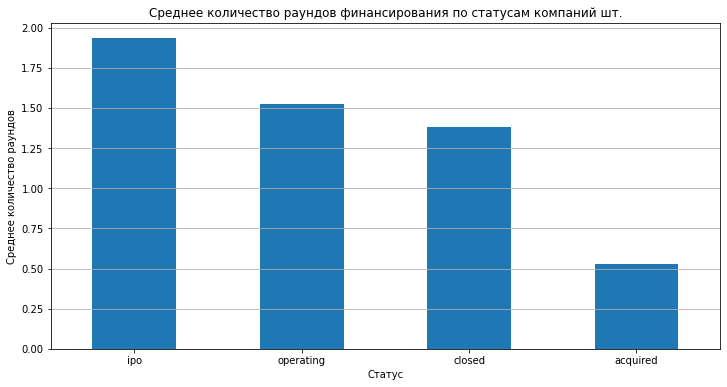

In [88]:
# Визуализируем данные
rounds_by_status.sort_values('mean_rounds', ascending=False).plot.bar(
                             x='status', 
                             y='mean_rounds',
                             rot=0,
                             figsize=(12, 6),
                             legend=False
)

# Настраиваем оформление графика
plt.title('Среднее количество раундов финансирования по статусам компаний шт.')
plt.xlabel('Статус')
plt.ylabel('Среднее количество раундов')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

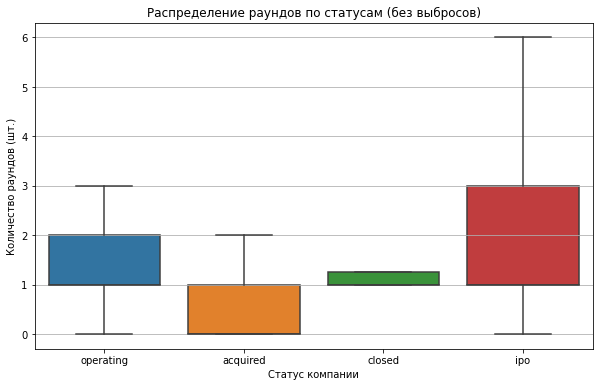

In [89]:
# Визуализируем данные
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='status',
    y='funding_rounds',
    showfliers=False
)

# Настраиваем оформление графика
plt.title('Распределение раундов по статусам (без выбросов)')
plt.ylabel('Количество раундов (шт.)')
plt.xlabel('Статус компании')
plt.grid(axis='y')

# Выведем график
plt.show()

Типичные значения:
- большинство компаний проходит только 1 раунд (медианна 1)
- категория operating большинство стартапов проходят от 1 до 2 раундов, небольшая часть стартапов проходит 3 раунда
- категория acquired, большинство стартапов проходят 1 раунд
- категория closed, стартапы, которые закрылись почти не доходят дальше 1 раунда
- категория ipo, наибольший разброс среди всех категорий, большинство стартапов от 1 до 3 раундов, часть до 6 раундов.

Выводы: компании с 2 раундами финансирования имеют больше шансов на успех и остаться на плаву. 


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Были загружены данные 7 датасетов, в которых содержалась информация о стартапах, раундах финансирования, информация о покупках, о персонале, информация об образовании персонала.

Для дальнейшего анализа мы провели работу по предобработке данных:
- проверили названия столбцов датафрейма и привели их к виду snake case
- проверили тип данных столбцов и привели их к нужному типу
  - столбец acquired_at, founded_at, closed_at, funded_at из формата object привести к формату datetime64
- изучены пропуски в данных
- проверили данные на наличие явных дубликатов и удалили их

Провели исследовательский анализ данных:
- составили сводную таблицу по годам на основании года финансирования и получили типичный размер финансирования раунда 
- проверили зависимость полноты сведений об образовании сотрудников от размера компании
- проверили, подходит ли для объединения данных столбец `network_username`
- разбили датасет company_and_rounds на два логичных датасета
- объединили новый датасет с датасетом с информвацией о покупках одних компаний другими
- оценили типичный размер финансирования 
- провели анализ компаний купленных за 1 лил 0 долларов
- выделили категории стартапов с типично высокими ценами и разбросом цен
- определили типичное количество раундов для каждого статуса стартапа

#### Итоговые выводы и рекомендации:
Типичный размер инвестиций до 5,6 млн. долл.
Категории стартапов с высокими ценами и разбросом цен: manufacturing и biotech. Категория Manufacturing имеет высокую медианную цену и соответсвенно высокую доходность, но требует крупных вложений. 
Компании с 2+ раундами имеют статистически более высокие шансы на успех. Оптимальный диапазон: 2-3 раунда, не стоит рассматривать компании категории Operating с 0 раундами и IPO-кандидаты с 1 раундом. 85% стартапов категории "operating" с 2+ раундами остаются на рынке.